In [1]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../gym-sepsis/")
import gym_sepsis
from gym_sepsis.envs.sepsis_env import SepsisEnv


Using TensorFlow backend.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
data = np.load("/Users/amir/code/stanford/cs221/project/processed_data.npz")
df = pd.read_csv("/Users/amir/Downloads/test_state_action_reward_df.csv")

In [3]:
sepsis_env = SepsisEnv()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [4]:
x = data['x_test']
y = data['y_test']

In [5]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']


In [6]:
episodes = df.groupby(["subject_id","hadm_id","icustay_id"])
len(df)

39232

In [7]:
subject_id = None
hadm_id = None
icustay_id = None

episodes = df.groupby(["subject_id","hadm_id","icustay_id"])

simulated_episodes = []
rewards = []

squared_sums = 0

counter = 1


for name, episode in episodes:
    # for each episode, play it back on it simulator
    episode_vals = episode.values
    actions = episode_vals[:,list(episode.columns).index("discrete_action")]
    simulated_episode = []
    starting_state = episode.iloc[0][columns].values[:46]
    sepsis_env.reset(starting_state=starting_state)
    done = False
    
    if counter %200 == 0:
        print("done with %f of episodes..." % (counter/len(episodes)))
        #print(squared_sums)
    counter +=1
    simulated_episode.append(starting_state)
    for action in actions:
       # if done:
            # simulated episode has ended but the real episode has not
            #simulated_episode.append(np.zeros(46))
        if not done:
            state, reward, done, _ = sepsis_env.step(action)
            rewards.append(reward)
            simulated_episode.append(state)
    
    # calculate differences
    squared_sum = 0
    index = 0
    for _, step in episode.iterrows():
        if index < len(simulated_episode):
            diff = step[columns].values - simulated_episode[index].reshape(46)
            diff = np.square(diff)
            squared_sum += diff
        index += 1
        
    #for idx in range(index +1 ,len(simulated_episode)):
    #    squared_sum += np.square(simulated_episode[idx])
        
    squared_sums += squared_sum


print(squared_sums)    

done with 0.058445 of episodes...
done with 0.116891 of episodes...
done with 0.175336 of episodes...
done with 0.233781 of episodes...
done with 0.292227 of episodes...
done with 0.350672 of episodes...
done with 0.409117 of episodes...
done with 0.467563 of episodes...
done with 0.526008 of episodes...
done with 0.584454 of episodes...
done with 0.642899 of episodes...
done with 0.701344 of episodes...
done with 0.759790 of episodes...
done with 0.818235 of episodes...
done with 0.876680 of episodes...
done with 0.935126 of episodes...
done with 0.993571 of episodes...
[9952.76554184787 16770.444316461715 3423.460974849076 17543.52205574716
 4606.910393456662 8910.190361499966 18179.017090229685 8036.009941210531
 23690.406183066378 40.13287737136338 22631.566962990433
 22011.793976927107 16345.09065400747 16348.254138898039
 17348.869340671037 28817.10144072019 22038.277661213888 18799.95106077624
 11315.398426297592 21781.921025842137 16638.61759706507 24009.12616789491
 26490.7209

In [15]:
episodes = df.groupby(["subject_id","hadm_id","icustay_id"])

lengths = []
rewards = []

counter = 1


for name, episode in episodes:
    # for each episode, play it back on it simulator
    episode_vals = episode.values
    actions = episode_vals[:,list(episode.columns).index("discrete_action")]
    simulated_episode = []
    starting_state = episode.iloc[0][columns].values[:46]
    sepsis_env.reset(starting_state=starting_state)
    
    if counter %200 == 0:
        print("done with %f of episodes..." % (counter/len(episodes)))
        #print(lengths)
    counter +=1
    simulated_episode.append(starting_state)
    
    done = False
    for action in actions:
        state, reward, done, _ = sepsis_env.step(action)
        rewards.append(reward)
        simulated_episode.append(state)
        if done:
            break
    
    lengths.append(len(simulated_episode))

done with 0.058445 of episodes...
done with 0.116891 of episodes...
done with 0.175336 of episodes...
done with 0.233781 of episodes...
done with 0.292227 of episodes...
done with 0.350672 of episodes...
done with 0.409117 of episodes...
done with 0.467563 of episodes...
done with 0.526008 of episodes...
done with 0.584454 of episodes...
done with 0.642899 of episodes...
done with 0.701344 of episodes...
done with 0.759790 of episodes...
done with 0.818235 of episodes...
done with 0.876680 of episodes...
done with 0.935126 of episodes...
done with 0.993571 of episodes...


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5]),
 <a list of 10 Patch objects>)

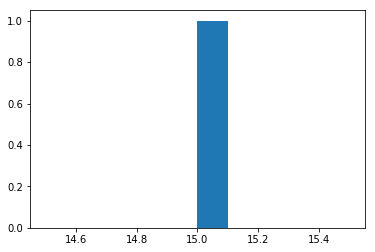

In [16]:
plt.hist(reward)

Text(0.5, 1.0, "Rewards for Physician's Policy on Simulator")

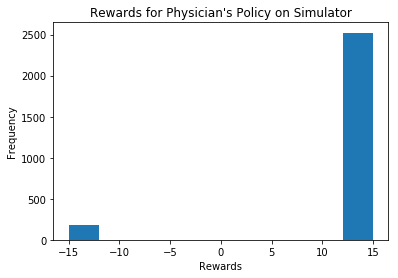

In [17]:
rewards = np.array(rewards)
rewards = rewards[np.abs(rewards) > 0]
plt.hist(rewards)
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Rewards for Physician\'s Policy on Simulator')

Text(0.5, 1.0, "Rewards for Physician's Policy in Real World")

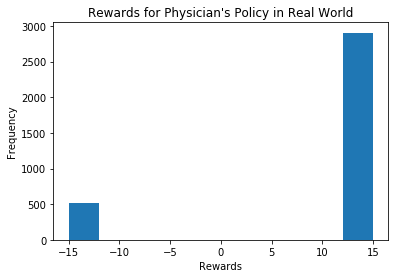

In [18]:
plt.hist(episodes.sum()["reward"])
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Rewards for Physician\'s Policy in Real World')

Text(0.5, 1.0, "Length of Episdoe for Physician's Policy in Real World")

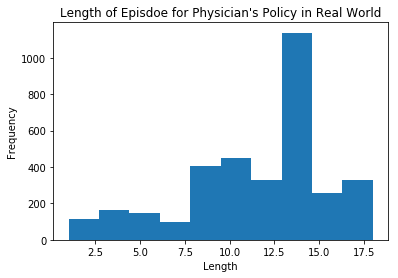

In [19]:
plt.hist(episodes.count()["reward"])
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length of Episdoe for Physician\'s Policy in Real World')

In [9]:
normalized_squared_sums = squared_sums

In [10]:
normalized_squared_sums.shape

(46,)

Text(0.5, 1.0, 'Trajectory Loss Across Features(RNN)')

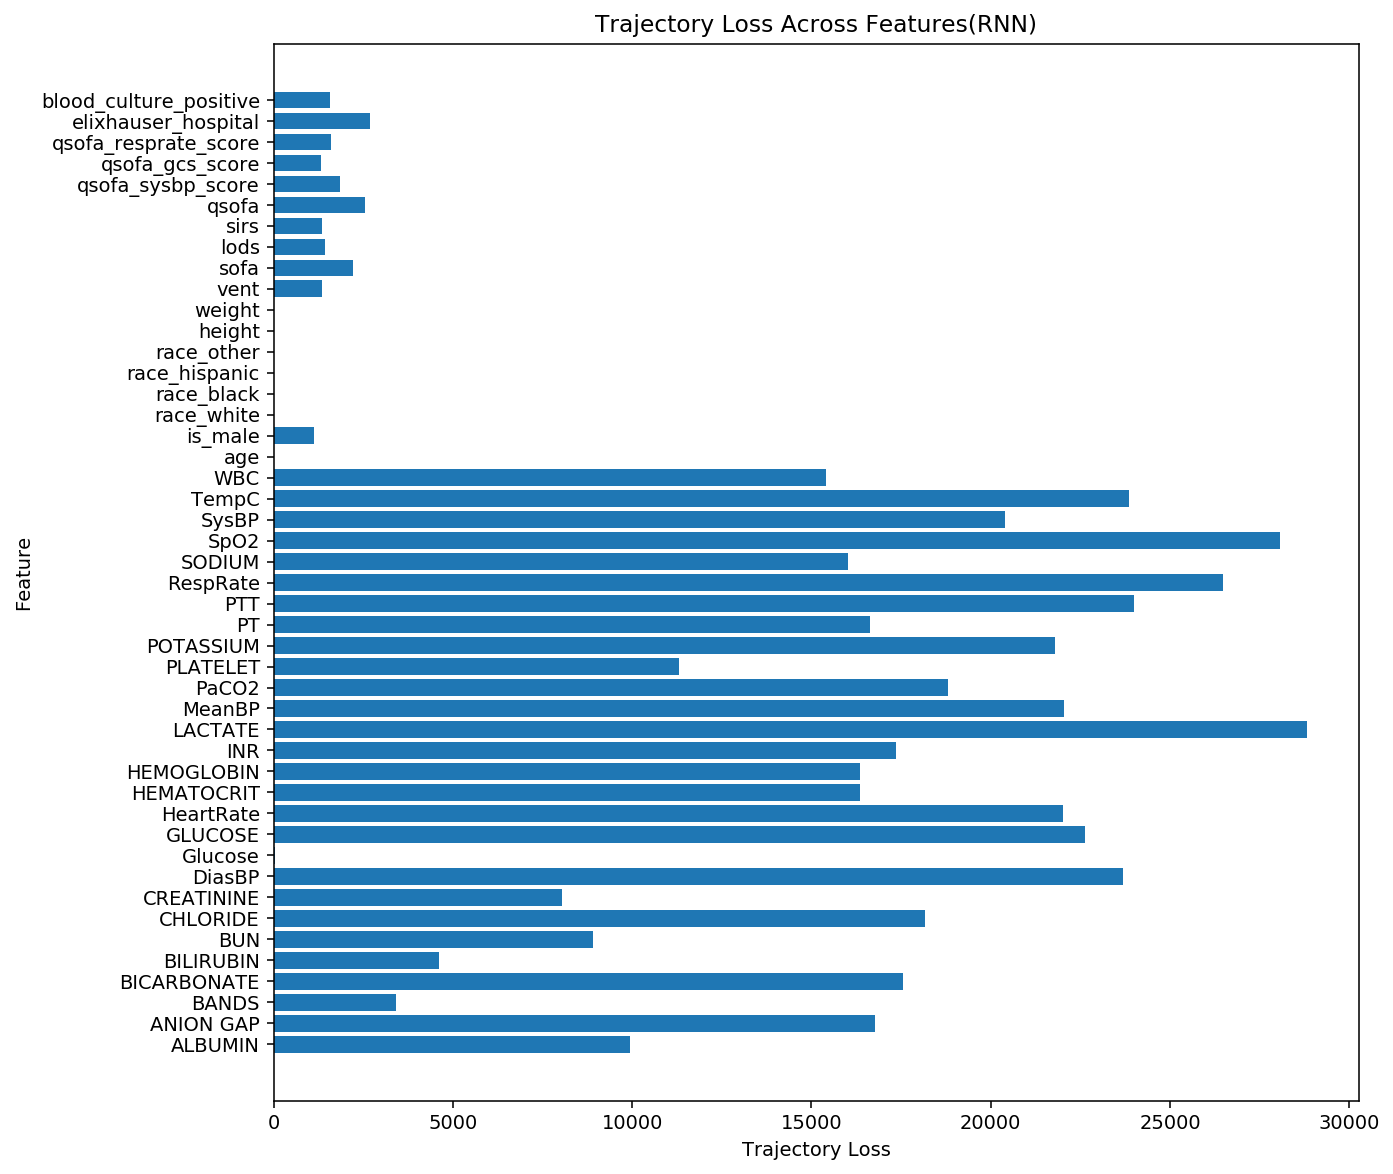

In [20]:
labels = [x for _,x in zip(normalized_squared_sums, columns)]

square_sums_bayesian = [21497.620362377093, 41038.79015391576, 9859.714502088667,
       40043.43631765179, 9941.003697468239, 21881.257500436524,
       39400.74791549517, 21870.214982571077, 45922.80566770426,
       2781.6103788354417, 48399.38864676179, 51520.125835491264,
       46592.305210266015, 43893.84578698402, 23660.33890168011,
       38442.24270036961, 45232.076903831876, 47171.80358344868,
       28782.086577858085, 55361.73386318945, 26572.390221087666,
       52733.11912289701, 51292.396076578036, 54563.7374030558,
       45412.5165602894, 44269.64486505508, 48445.94385747661,
       28990.166808170772, 0.0, 2825.452670301446, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 3106.2317324483265, 3254.597243572014,
       3065.8460368384062, 3805.3494228012537, 12118.35792353282,
       25444.809094897453, 33952.09668689641, 30855.5248966012,
       4497.843538846761, 2597.4021676870366]

ind = np.arange(len(square_sums_bayesian))
width = 0.4

pos = np.arange(len(labels))

plt.figure(num=None, figsize=(10, 10), dpi=140)
plt.barh(width=normalized_squared_sums, y=pos)
plt.yticks(pos, labels)
plt.xlabel('Trajectory Loss')
plt.ylabel('Feature')
plt.title('Trajectory Loss Across Features(RNN)')

Text(0.5, 1.0, "Length of Episdoes Using Physician's Policy in Real World")

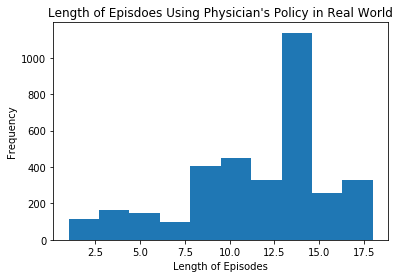

In [23]:
plt.hist(episodes.count()["race_black"].values)
plt.xlabel('Length of Episodes')
plt.ylabel('Frequency')
plt.title('Length of Episdoes Using Physician\'s Policy in Real World')

In [ ]:
 twe